# Part 1 Business Understanding 

A closer look at the Toronto public bike sharing data downloaded from Kaggle, and learnings for potencial bike users or public officials

### Q1 What's the trending like year by year? Is bike riding getting more popular?

### Q2 At which station did bike rides usually start?

### Q3 How long does a trip usually take? Does it fluctuate by year?

### Q4 Is there any correlation between quarter of the year and trip length?

In [2]:
import pandas as pd

In [74]:
import numpy as np

In [15]:
import datetime

In [29]:
!pip install dython

In [30]:
from dython.nominal import associations

In [2]:
%matplotlib inline

# Part 2-3 Data Understanding and Preparation

- Collect initial data

In [3]:
stations = pd.read_csv('./OneDrive/Documents/pj/Udacity nd/lesson1/archive/toronto/stations.csv')

In [8]:
trips = pd.read_csv('./OneDrive/Documents/pj/Udacity nd/lesson1/archive/toronto/trips.csv')

- Data description and inspection

In [4]:
trips.head(5)

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,yearid
0,2016-07-09 01:03:00,0,2016-07-09 01:15:00,160,720.0,0,2016
1,2016-09-03 22:37:00,0,2016-09-03 22:48:00,160,660.0,0,2016
2,2016-08-05 16:21:00,0,2016-08-05 16:33:00,160,720.0,0,2016
3,2016-09-23 10:15:00,0,2016-09-23 10:28:00,160,780.0,0,2016
4,2016-10-15 13:40:00,0,2016-10-15 13:51:00,160,660.0,0,2016


In [7]:
trips.shape

(9348395, 7)

In [8]:
stations.shape

(1927, 5)

In [5]:
trips.isnull().sum()

start_date            0
start_station_code    0
end_date              0
end_station_code      0
duration_sec          0
is_member             0
yearid                0
dtype: int64

From above, no missing values in trips dataframe

In [6]:
stations.isnull().sum()

code            0
name            0
latitude     1927
longitude    1927
yearid          0
dtype: int64

From above, column latitude and longitude do not contain any value except null.
Thus we'll drop column latitude and longitude below.

In [5]:
stations.drop(columns=['latitude', 'longitude'],inplace=True)

Inspect if station code varies in different years

first use groupby to see the station counts by year.

In [66]:
stations.groupby('yearid')['name'].count().reset_index().rename(columns={'name':'total_stations'})

,yearid,total_stations
0,2016,201
1,2017,293
2,2018,359
3,2019,469
4,2020,605


From above, it seems there are more stations available across the years.

But is it possible that there are duplicated stations per year? We'll use unique count by year to confirm.

In [4]:
stations.groupby('yearid')['name'].nunique().reset_index().rename(columns={'name':'total_stations'})

,yearid,total_stations
0,2016,201
1,2017,293
2,2018,359
3,2019,469
4,2020,605


We see there are no duplicates per year for station names. The station count did increase every year.

Move on to further inspect the trips dataframe

In [42]:
trips.describe()

,start_station_code,end_station_code,duration_sec,is_member,yearid
count,9.348395e+06,9.348395e+06,9.348395e+06,9.348395e+06,9.348395e+06
mean,1.592977e+02,1.598529e+02,1.004293e+03,5.671952e-01,2.018598e+03
std,1.216603e+02,1.213733e+02,1.352750e+05,4.954643e-01,1.248066e+00
min,0.000000e+00,0.000000e+00,-2.799342e+07,0.000000e+00,2.016000e+03
25%,6.300000e+01,6.300000e+01,4.200000e+02,0.000000e+00,2.018000e+03
50%,1.300000e+02,1.320000e+02,7.200000e+02,1.000000e+00,2.019000e+03
75%,2.290000e+02,2.290000e+02,1.140000e+03,1.000000e+00,2.020000e+03
max,6.030000e+02,6.040000e+02,1.240020e+07,1.000000e+00,2.020000e+03


From above duration_sec has negative values, which doesn't make sense. Trip duration can't be negative.

Below, we see 594 records with negative trip duration. 

We are not sure if they are due to data collection error or a simple misplaced -/+. Thus these records will be dropped.

In [44]:
sum(trips.duration_sec<0)

594

In [9]:
trips = trips[trips.duration_sec>=0]

In [46]:
sum(trips.duration_sec<0)

0

Check the data types

In [44]:
trips.dtypes

start_date             object
start_station_code      int64
end_date               object
end_station_code        int64
duration_sec          float64
is_member               int64
yearid                  int64
dtype: object

Start_date is currently a string but we need to convert it to be datetime

In [49]:
trips['start_date'] = pd.to_datetime(trips.start_date)

In [51]:
trips.dtypes

start_date            datetime64[ns]
start_station_code             int64
end_date                      object
end_station_code               int64
duration_sec                 float64
is_member                      int64
yearid                         int64
dtype: object

In [6]:
stations.describe()

,code,yearid
count,1927.000000,1927.000000
mean,217.745200,2018.510638
std,149.299952,1.344874
min,0.000000,2016.000000
25%,96.000000,2017.000000
50%,192.000000,2019.000000
75%,316.500000,2020.000000
max,604.000000,2020.000000


# Part 4 Evaluation

## Q1 What's the trending like year by year? Is bike riding getting more popular?

Use group by to see total counts of trips by year

In [68]:
trips.groupby('yearid')['start_date'].count()

yearid
2016     585372
2017    1491951
2018    1922951
2019    2439057
2020    2908470
Name: start_date, dtype: int64

what % more from 2016 to 2020?

In [69]:
2908470/585372

4.968584079867162

Visualize: Use bar chart to see the total trips trend across the years

<AxesSubplot:xlabel='yearid', ylabel='total trips'>

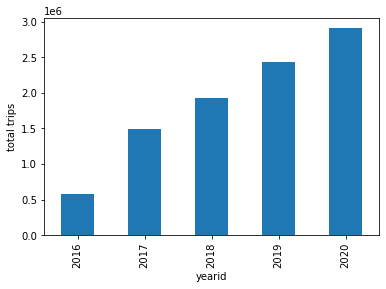

In [67]:
trips.groupby('yearid')['start_date'].count().plot(kind='bar',ylabel='total trips')

More bikes trips are made every year. We see a total of ~3 million bike trips in 2020, in contrast to only 0.5 million in 2016

## Q2 At which station did bike rides usually start?

First use groupby to get the trip counts at each station from each year,saving it to a new dataframe

In [48]:
trip_start = trips.groupby(['yearid','start_station_code'])['start_date'].count().reset_index()

Since the trips dataframe doesn't contain the actual station names, we'll merge with stations to get the station names

In [49]:
trip_start = pd.merge(trip_start,stations,left_on=['yearid','start_station_code'],right_on=['yearid','code'],how='left')

Use idxmax to return the records with the most trips from each year

In [50]:
trip_start.loc[trip_start.groupby(['yearid'])['start_date'].idxmax()][['yearid','name']]

,yearid,name
2,2016,Union Station
361,2017,Union Station
666,2018,York St / Queens Quay W
1041,2019,York St / Queens Quay W
1549,2020,Queens Quay E / Lower Sherbourne St


Most bike trips originated from Union Station back in 2016 and 2017, but were taken over by York St/QueensQuay W and QueensQuay W/Lower Sherbourne St in more recent years. 

## Q3 How long does a trip usually take? Does it fluctuate by year?

Use groupby to calculate the average trip duration in minutes per year.

In [70]:
trips.groupby('yearid')['duration_sec'].mean()/60 #converted to minutes

yearid
2016    88.796697
2017    74.589459
2018    16.049509
2019    17.400436
2020    19.389257
Name: duration_sec, dtype: float64

Visualize: Use bar chart to see the average trip length in minutes across the years

<AxesSubplot:xlabel='yearid', ylabel='avg trip duration mins'>

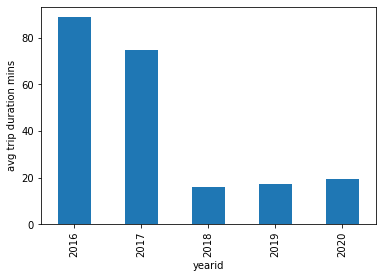

In [80]:
trips.groupby('yearid')['duration_sec'].agg(lambda x:x.mean()/60).plot(kind='bar',ylabel='avg trip duration mins')

There's a significant decrease in bike trip duration across the years. Back in 2016/2017, a bike trip takes more than an hour on average. In more recent years, people tend to rent a bike for much smaller trips, which are 20 minutes or so on average.

## Q4 Is there any correlation between quarter of the year and trip length?

We have the date/time of each trip. We'll need a new column quarter based on the date column.

Below toquarter function returns the quarter as a string based on the date

In [13]:
def toquarter(tripdate):
    '''
    input:
    tripdate - column that gives the trip date
    
    output:
    quarter - new colmn that shows the quarter of the year based on trip date
    '''
    quarter_num = tripdate.dt.quarter
    quarter = '1st' if quarter_num==1 else '2nd' if quarter_num==2 else '3rd' if quarter_num==3 else \
              '4th' if quarter_num==4 else 'na'
    return quarter

In [52]:
trips['quarter'] = trips.start_date.map(toquarter)

In [56]:
trips.shape

(9347801, 8)

In [53]:
trips.head(5)

,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member,yearid,quarter
0,2016-07-09 01:03:00,0,2016-07-09 01:15:00,160,720.0,0,2016,3rd
1,2016-09-03 22:37:00,0,2016-09-03 22:48:00,160,660.0,0,2016,3rd
2,2016-08-05 16:21:00,0,2016-08-05 16:33:00,160,720.0,0,2016,3rd
3,2016-09-23 10:15:00,0,2016-09-23 10:28:00,160,780.0,0,2016,3rd
4,2016-10-15 13:40:00,0,2016-10-15 13:51:00,160,660.0,0,2016,4th


Visualize: Use associations to check the correlation between quarter and trip duration

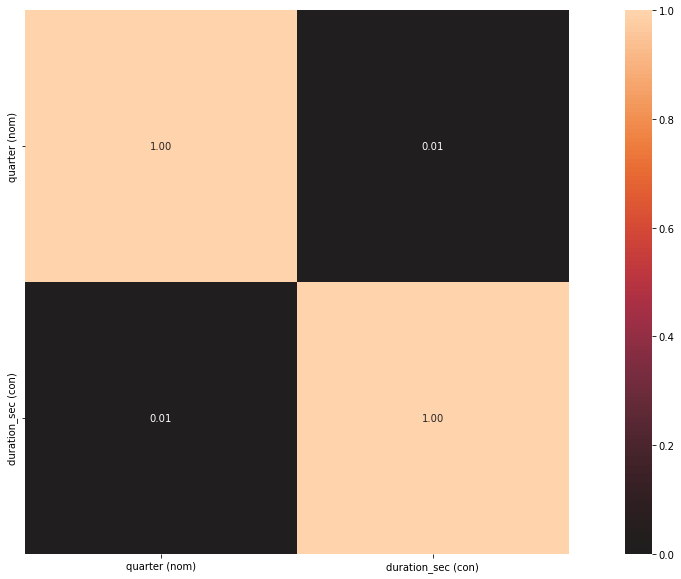

In [57]:
associations(trips[['quarter','duration_sec']],figsize=(20,10),mark_columns=True);

In [58]:
trips.groupby('quarter')['duration_sec'].mean()

quarter
1st    3545.748065
2nd    1965.634358
3rd    1637.656570
4th    1637.645521
Name: duration_sec, dtype: float64

Statistically we explored the correlation between bike trip duration and quarter of the year. There is no apparent association based on the correlation factor of 0.01. Although when looking at the average trip length by quarter, it seems trips are much longer during the 1st quarter. It's baffling to see trips are longer during the coldest months (usually Jan and Feb) in Toronto. Further research is needed as of why this is the case.